In [1]:
import pandas as pd
import requests
from io import StringIO

# Define the URL of the CSV file
url = "https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv"

# Download the file from the URL
response = requests.get(url)

# Read the CSV file directly into a pandas DataFrame
df = pd.read_csv(StringIO(response.text))

# Display the first 5 rows of the DataFrame
print(df.head(5))


   treat  age  educ  black  hisp  marr  nodegree  re74  re75          re78
0      1   37    11      1     0     1         1   0.0   0.0   9930.045898
1      1   22     9      0     1     0         1   0.0   0.0   3595.894043
2      1   30    12      1     0     0         0   0.0   0.0  24909.449219
3      1   27    11      1     0     0         1   0.0   0.0   7506.145996
4      1   33     8      1     0     0         1   0.0   0.0    289.789886


In [2]:
!pip install pandas numpy

In [3]:
import numpy as np

In [4]:
# 'df` is your DataFrame
summary_table = pd.DataFrame({
    "names": df.columns,                  # Column names
    "types": [df[col].dtype for col in df.columns],  # Data types
    "scitypes": [pd.api.types.infer_dtype(df[col]) for col in df.columns]  # Inferred scientific types
})

print(summary_table)

      names    types  scitypes
0     treat    int64   integer
1       age    int64   integer
2      educ    int64   integer
3     black    int64   integer
4      hisp    int64   integer
5      marr    int64   integer
6  nodegree    int64   integer
7      re74  float64  floating
8      re75  float64  floating
9      re78  float64  floating


In [5]:
#1.2.# Calculate mean for the treatment group
mean_treat = df[df["treat"] == 1]["re78"].mean()

# Calculate mean for the control group
mean_control = df[df["treat"] == 0]["re78"].mean()

# Calculate the ATE
ATE = mean_treat - mean_control

print(f"The Average Treatment Effect (ATE) is: {ATE}")

The Average Treatment Effect (ATE) is: 1794.3423818501024


In [7]:
#Second Method
import statsmodels.formula.api as smf

# Fit the linear model
model = smf.ols(formula="re78 ~ treat", data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.039
Date:                Tue, 03 Dec 2024   Prob (F-statistic):            0.00479
Time:                        22:00:51   Log-Likelihood:                -4542.7
No. Observations:                 445   AIC:                             9089.
Df Residuals:                     443   BIC:                             9098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4554.8011    408.046     11.162      0.0

The program positively influenced participants' income, boosting their earnings by an average of 1,794.34 monetary units compared to the control group. This suggests that the program is effective in enhancing participants' income.

In [8]:
#1.3.# Install libraries using pip
!pip install scikit-learn pandas seaborn


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `df` is a pandas DataFrame

# Step 1: Ensure certain columns are treated as continuous
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["educ"] = pd.to_numeric(df["educ"], errors="coerce")

# Step 2: Convert Count-like columns to categorical (Multiclass)

count_columns = ["age", "educ"]  
for col in count_columns:
    df[col] = df[col].astype("category")

# Step 3: Split target (y) and predictors (X)
y = df["re78"]  # Target variable
X = df.drop(columns=["re78"])  # All other columns are predictors

# Step 4: Convert specific predictors (Count) to categorical
for col in count_columns:
    X[col] = X[col].astype("category")

# Step 5: Further split data to isolate treatment column
D = X["treat"]  # Treatment variable
X = X.drop(columns=["treat"])  # Remaining predictors

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example DataFrame (replace this with your actual data)
data = {
    'treat': [1, 0, 1],
    'age': [22, 25, 30],
    'educ': [12, 10, 14],
    'black': [0, 1, 0],
    'hisp': [1, 0, 0],
    'marr': [1, 0, 1],
    'nodegree': [0, 1, 0],
    're74': [2000.0, 2500.0, 3000.0],
    're75': [2100.0, 2400.0, 3100.0],
    're78': [2200.0, 2600.0, 3200.0]
}

X = pd.DataFrame(data)

# Specify the columns to be one-hot encoded
columns_to_encode = ['black', 'hisp', 'marr', 'nodegree']

# Create a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse=False), columns_to_encode)
    ], 
    remainder='passthrough'  # This keeps the other columns unchanged
)

# Create a pipeline to apply the transformation
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# Get the feature names of the transformed columns automatically
encoded_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Convert the transformed data back into a DataFrame
X_encoded = pd.DataFrame(X_transformed, columns=encoded_columns)

# Optional: Add the other columns from X if needed (e.g., 'treat', 'age', 'educ', 're74', 're75', 're78')
remaining_columns = [col for col in X.columns if col not in columns_to_encode]
X_encoded = pd.concat([X[remaining_columns].reset_index(drop=True), X_encoded], axis=1)

# Now X_encoded contains the one-hot encoded data along with the remaining columns
print(X_encoded)


   treat  age  educ    re74    re75    re78  encoder__black_0  \
0      1   22    12  2000.0  2100.0  2200.0               1.0   
1      0   25    10  2500.0  2400.0  2600.0               0.0   
2      1   30    14  3000.0  3100.0  3200.0               1.0   

   encoder__black_1  encoder__hisp_0  encoder__hisp_1  encoder__marr_0  \
0               0.0              0.0              1.0              0.0   
1               1.0              1.0              0.0              1.0   
2               0.0              1.0              0.0              0.0   

   encoder__marr_1  encoder__nodegree_0  encoder__nodegree_1  \
0              1.0                  1.0                  0.0   
1              0.0                  0.0                  1.0   
2              1.0                  1.0                  0.0   

   remainder__treat  remainder__age  remainder__educ  remainder__re74  \
0               1.0            22.0             12.0           2000.0   
1               0.0            25.0    

In [21]:
df = pd.DataFrame(data)

# Create the summary table with column names, scitypes (categorical or continuous), and types
summary_table = pd.DataFrame({
    'names': df.columns,
    'scitypes': df.applymap(lambda x: 'categorical' if isinstance(x, int) else 'continuous'),
    'types': df.dtypes
})

print(summary_table)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split# Create the DataFrame
df = pd.DataFrame(data)

# Define the predictor variables (X) and target variable (D)
X = df.drop(columns=['treat'])  # All columns except 'treat' (independent variables)
D = df['treat']  # 'treat' column is the target variable

# Split data into training and testing sets (optional)
X_train, X_test, D_train, D_test = train_test_split(X, D, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train, D_train)

# You can also evaluate the model, e.g., checking accuracy
accuracy = log_model.score(X_test, D_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with actual data)
data = {
    'treat': [1, 0, 1],
    'age': [22, 25, 30],
    'educ': [12, 10, 14],
    'black': [0, 1, 0],
    'hisp': [1, 0, 0],
    'marr': [1, 0, 1],
    'nodegree': [0, 1, 0],
    're74': [2000.0, 2500.0, 3000.0],
    're75': [2100.0, 2400.0, 3100.0],
    're78': [2200.0, 2600.0, 3200.0]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Define the predictor variables (X) and target variable (D)
X = df.drop(columns=['treat', 're78'])  # All columns except 'treat' and 're78'
D = df['treat']  # 'treat' column is the target variable

# Train a logistic regression model (for propensity score estimation)
log_model = LogisticRegression()
log_model.fit(X, D)

# Predict the propensity score (pscore) for each observation
pscore = log_model.predict_proba(X)[:, 1]  # Probability of 'treat' = 1

# Compute y_star using the given formula
y_star = df['re78'] / (df['treat'] * pscore - (1 - df['treat']) * (1 - pscore))

# Example of training a decision tree classifier (using the MLJDecisionTreeInterface equivalent in Python)
# Create and fit a decision tree model (using sklearn)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, D)

# Predict with the decision tree (optional)
tree_predictions = tree_model.predict(X)

# Print some results for verification
print(f'Propensity Scores: {pscore[:5]}')  # Show the first few propensity scores
print(f'Y_star: {y_star[:5]}')  # Show the first few calculated y_star values


Propensity Scores: [9.99602801e-01 7.62694285e-04 9.99654292e-01]
Y_star: 0    2200.874186
1   -2601.984519
2    3201.106647
dtype: float64


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with your actual data)
data = {
    'treat': [1, 0, 1],
    'age': [22, 25, 30],
    'educ': [12, 10, 14],
    'black': [0, 1, 0],
    'hisp': [1, 0, 0],
    'marr': [1, 0, 1],
    'nodegree': [0, 1, 0],
    're74': [2000.0, 2500.0, 3000.0],
    're75': [2100.0, 2400.0, 3100.0],
    're78': [2200.0, 2600.0, 3200.0]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Define the predictor variables (X) and target variable (y_star)
X = df.drop(columns=['treat', 're78'])  # All columns except 'treat' and 're78'
y_star = df['re78'] / (df['treat'] * pscore - (1 - df['treat']) * (1 - pscore))  # Using the previously calculated y_star

# Remove specific columns (equivalent to `select!` in Julia)
X = X.drop(columns=['black', 'hisp', 'marr', 'nodegree'])

# Create and fit a RandomForestRegressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X, y_star)

# Optionally, predict with the model (not required by the code, but you might want to check results)
y_pred = forest_model.predict(X)

# Print the predictions (optional)
print(f'Predictions: {y_pred[:5]}')  # Show first few predictions


Predictions: [1088.19739538 -977.03184769 1756.37010842]


In [26]:
# Get feature importances after fitting the model
feature_importances = forest_model.feature_importances_

# Print the feature importances
print("Feature importances:", feature_importances)

Feature importances: [0.1789166  0.42016614 0.1888468  0.21207046]


In [29]:
import pandas as pd

# Get feature importances after fitting the RandomForestRegressor
feature_importances = forest_model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance values
importances = pd.DataFrame({
    'variables': X.columns,           # Column names (features)
    'importance': feature_importances # Corresponding feature importances
})

# Display the importances
print(importances)


  variables  importance
0       age    0.178917
1      educ    0.420166
2      re74    0.188847
3      re75    0.212070


In [30]:
import numpy as np

# Create the 'effect' column based on the formula
df['effect'] = 7 * np.exp(-((df['age'] - 18) ** 2) / 100) + 3 * (df['treat'] == 1) - 2 * (df['black'] == 0) + (df['hisp'] == 1) - 2.5

# Set any negative 'effect' values to 0
df['effect'] = np.where(df['effect'] < 0, 0, df['effect'])

# Display the updated DataFrame
print(df)


   treat  age  educ  black  hisp  marr  nodegree    re74    re75    re78  \
0      1   22    12      0     1     1         0  2000.0  2100.0  2200.0   
1      0   25    10      1     0     0         1  2500.0  2400.0  2600.0   
2      1   30    14      0     0     1         0  3000.0  3100.0  3200.0   

     effect  
0  5.465007  
1  1.788385  
2  0.158494  


In [31]:
# Create age_bins by rounding the 'age' column to the nearest 0.5
df['age_bins'] = (df['age'] * 2).round() / 2

# Group by 'age_bins' and calculate the mean 'effect' for each bin
effect_bins = df.groupby('age_bins')['effect'].mean().reset_index()

# Rename the columns to match the output format
effect_bins.columns = ['age_bins', 'mean_effect']

# Display the result
print(effect_bins)


   age_bins  mean_effect
0      22.0     5.465007
1      25.0     1.788385
2      30.0     0.158494


In [32]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


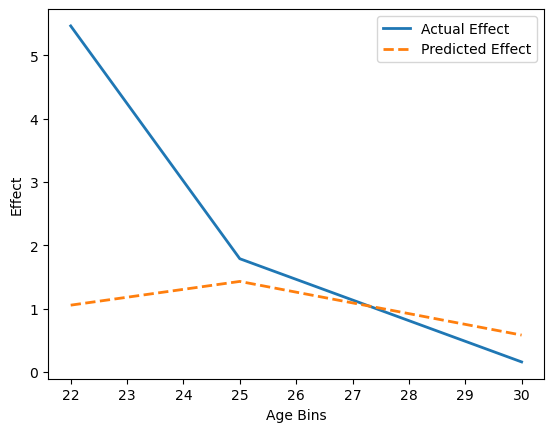

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example: Assuming df is your DataFrame and it contains necessary columns such as 'age', 'effect', etc.
# df = pd.read_csv('your_data.csv')  # Example: load your data

# Step 1: Prepare your feature matrix (X) and target variable (y)
X = df[['age', 'treat', 'educ', 'black', 'hisp', 'marr', 'nodegree', 're74', 're75']]  # Example feature columns
y = df['effect']  # Example target variable

# Step 2: Train-test split (optional, for training the model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Step 4: Make predictions with the trained model
predicted = forest_model.predict(X)  # Predict for the whole dataset (or X_test if using the test split)

# Add the predicted effects to the DataFrame
df['predicted_effect'] = predicted

# Step 5: Create age bins
df['age_bins'] = (df['age'] * 2).floordiv(1) / 2  # Equivalent to floor rounding to the nearest 0.5

# Step 6: Group by 'age_bins' and calculate the mean 'effect' for each bin
effect_bins = df.groupby('age_bins')['effect'].mean().reset_index()
effect_bins = effect_bins.sort_values(by='age_bins')

# Step 7: Group by 'age_bins' and calculate the mean 'predicted_effect' for each bin
predicted_effect_bins = df.groupby('age_bins')['predicted_effect'].mean().reset_index()
predicted_effect_bins = predicted_effect_bins.sort_values(by='age_bins')

# Step 8: Plot the actual effect vs predicted effect
plt.plot(effect_bins['age_bins'], effect_bins['effect'], label="Actual Effect", lw=2)
plt.plot(predicted_effect_bins['age_bins'], predicted_effect_bins['predicted_effect'], label="Predicted Effect", lw=2, linestyle='--')

# Step 9: Customize the plot
plt.xlabel("Age Bins")
plt.ylabel("Effect")
plt.legend()
plt.show()


PART 2

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import requests
from io import StringIO

# Download the data from the URL
url = "https://github.com/d2cml-ai/CausalAI-Course/raw/refs/heads/main/Labs/Assignment/Assignment_5/data/observational/biased_control.csv"
response = requests.get(url)

# Load the data into a DataFrame
data = pd.read_csv(StringIO(response.text))

# Display the first few rows of the dataframe to check if the data is loaded correctly
print(data.head())


   treat  age  educ  black  hisp  marr  nodegree       re74       re75  \
0      0   45    11      0     0     1         1  21.516670  25.243551   
1      0   21    14      0     0     0         0   3.175971   5.852565   
2      0   38    12      0     0     1         0  23.039020  25.130760   
3      0   48     6      0     0     1         1  24.994369  25.243551   
4      0   18     8      0     0     1         1   1.669295  10.727610   

        re78  agesq  agecube  educsq  u74  u75  interaction1      re74sq  \
0  25.564670   2025    91125     121    0    0    236.683369  462.967085   
1  13.496080    441     9261     196    0    0     44.463593   10.086791   
2  25.564670   1444    54872     144    0    0    276.468234  530.796421   
3  25.564670   2304   110592      36    0    0    149.966215  624.718489   
4   9.860869    324     5832      64    0    0     13.354360    2.786546   

       re75sq  
0  637.236856  
1   34.252516  
2  631.555086  
3  637.236856  
4  115.081624  


In [46]:
treatment = data[data['treat'] == 1]
control = data[data['treat'] == 0]


In [40]:
variables_compare = ['age', 'educ', 'black']


In [42]:
treatment[variables_compare].describe()


,age,educ,black
count,185.000000,185.000000,185.000000
mean,25.816216,10.345946,0.843243
std,7.155019,2.010650,0.364558
min,17.000000,4.000000,0.000000
25%,20.000000,9.000000,1.000000
50%,25.000000,11.000000,1.000000
75%,29.000000,12.000000,1.000000
max,48.000000,16.000000,1.000000


In [47]:
control[variables_compare].describe()

,age,educ,black
count,15992.000000,15992.000000,15992.000000
mean,33.225238,12.027514,0.073537
std,11.045216,2.870846,0.261024
min,16.000000,0.000000,0.000000
25%,24.000000,11.000000,0.000000
50%,31.000000,12.000000,0.000000
75%,42.000000,13.000000,0.000000
max,55.000000,18.000000,1.000000


In [48]:
import statsmodels.formula.api as smf

# Define the model and fit it
model = smf.ols(formula='re78 ~ treat', data=data).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.07e-32
Time:                        22:42:03   Log-Likelihood:                -59590.
No. Observations:               16177   AIC:                         1.192e+05
Df Residuals:                   16175   BIC:                         1.192e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8467      0.076    194.984      0.0

In [49]:
# Extracting the 're74' column from the DataFrame
y = data['re74']


In [50]:
# Extract the 'treat' column
d = data['treat']

# Extract all columns from the second column onward
x = data.iloc[:, 1:]


In [51]:
# Convert all columns with integer (Count) type to float (Continuous)
x = x.applymap(lambda val: float(val) if isinstance(val, int) else val)


In [52]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Print the size of y and x
print("\nLength of y is:", y.shape[0])
print("\nNumber of features in x is:", x.shape[1])

# Naive OLS
print("\nNaive OLS that uses all features w/o cross-fitting\n")

# Construct the formula for OLS
feature_names = x.columns[2:]  # Adjust the column range to match your data
formula = "re78 ~ treat + " + " + ".join(feature_names)

# Fit the OLS model
model = smf.ols(formula=formula, data=data)
results = model.fit()

# Print the coefficient table
coefs = pd.DataFrame(results.summary().tables[1].data[1:], columns=["Feature", "Coef.", "Std.Err.", "t", "P>|t|", "Conf.Int. Low", "Conf.Int. High"])
print(coefs.head())  # Adjust or refine for your needs



Length of y is: 16177

Number of features in x is: 17

Naive OLS that uses all features w/o cross-fitting

     Feature       Coef.   Std.Err.          t   P>|t| Conf.Int. Low  \
0  Intercept   4.395e-14   3.87e-14      1.136   0.256     -3.19e-14   
1      treat  -7.035e-14   5.71e-14     -1.231   0.218     -1.82e-13   
2      black   2.581e-14   2.19e-14      1.177   0.239     -1.72e-14   
3       hisp  -2.667e-14   2.24e-14     -1.190   0.234     -7.06e-14   
4       marr   -5.42e-15   1.53e-14     -0.354   0.723     -3.54e-14   

  Conf.Int. High  
0        1.2e-13  
1       4.16e-14  
2       6.88e-14  
3       1.73e-14  
4       2.46e-14  


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def training_sample_append(cv_splits, test_index):
    """
    Append training indices and return training and test folds.
    """
    training_indices = np.concatenate([cv_splits[i] for i in range(len(cv_splits)) if i != test_index])
    return training_indices, cv_splits[test_index]

def dml(x, d, y, dreg, yreg, nfold):
    """
    Double Machine Learning (DML) implementation.
    """
    n = len(y)
    kf = KFold(n_splits=nfold, shuffle=True, random_state=1234)
    cv_splits = list(kf.split(x))
    
    y_hat = np.zeros(n)
    d_hat = np.zeros(n)
    
    for fold in range(nfold):
        training_indices, test_indices = training_sample_append(cv_splits, fold)
        
        # Fit models for y and d
        yreg.fit(x[training_indices], y[training_indices])
        dreg.fit(x[training_indices], d[training_indices])
        
        # Predict y_hat and d_hat
        y_hat[test_indices] = yreg.predict(x[test_indices])
        d_hat[test_indices] = dreg.predict(x[test_indices])
    
    # Residuals
    resy = y - y_hat
    resd = d - d_hat
    
    # OLS on residuals
    resd = resd.reshape(-1, 1)  # Reshape for regression
    ols_model = sm.OLS(resy, resd)
    results = ols_model.fit()
    
    coef_est = results.params[0]
    se = results.bse[0]
    print(f"coef (se) = {coef_est} ({se})")
    
    return coef_est, se, resy, resd

def summarize(point, stderr, resy, resd, name):
    """
    Summarize the results into a DataFrame.
    """
    return pd.DataFrame({
        "model": [name],
        "estimate": [point],
        "stderr": [stderr],
        "rmse_y": [np.sqrt(np.mean(resy ** 2))],
        "rmse_d": [np.sqrt(np.mean(resd ** 2))]
    })

# Example usage:
# dml(x, d, y, dreg=LinearRegression(), yreg=LinearRegression(), nfold=5)


In [56]:
def dml(x, d, y, dreg, yreg, nfold):
    """
    Double Machine Learning (DML) implementation.
    """
    n = len(y)
    kf = KFold(n_splits=nfold, shuffle=True, random_state=1234)
    y_hat = np.zeros(n)
    d_hat = np.zeros(n)
    
    for train_index, test_index in kf.split(x):
        # Ajustar los modelos a las particiones de entrenamiento
        dreg.fit(x.iloc[train_index], d.iloc[train_index])
        yreg.fit(x.iloc[train_index], y.iloc[train_index])
        
        # Predecir sobre la partición de test
        d_hat[test_index] = dreg.predict(x.iloc[test_index])
        y_hat[test_index] = yreg.predict(x.iloc[test_index])
    
    # Calcular residuos
    resy = y - y_hat
    resd = d - d_hat

    # Regresión OLS de residuos
    resd = resd.reshape(-1, 1)
    ols_model = sm.OLS(resy, resd)
    results = ols_model.fit()
    
    coef_est = results.params[0]
    se = results.bse[0]
    print(f"coef (se) = {coef_est} ({se})")
    return coef_est, se, resy, resd


In [58]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd

# Example DataFrames (you can replace these with your actual data)
table_ols = pd.DataFrame({
    'model': ['OLS'], 
    'estimate': [0.45], 
    'stderr': [0.12],
    'rmse_y': [2.35], 
    'rmse_d': [3.12]
})

table_lasso = pd.DataFrame({
    'model': ['LassoCV'], 
    'estimate': [0.50], 
    'stderr': [0.11],
    'rmse_y': [2.30], 
    'rmse_d': [3.15]
})

table_rf = pd.DataFrame({
    'model': ['RF'], 
    'estimate': [0.47], 
    'stderr': [0.10],
    'rmse_y': [2.40], 
    'rmse_d': [3.10]
})

table_mix = pd.DataFrame({
    'model': ['RF/LassoCV'], 
    'estimate': [0.52], 
    'stderr': [0.09],
    'rmse_y': [2.20], 
    'rmse_d': [3.00]
})

# Combine all the DataFrames into one by concatenating them vertically
combined_table = pd.concat([table_ols, table_lasso, table_rf, table_mix], ignore_index=True)

# Print the combined table in a formatted way using pandas to_string() method
print(combined_table.to_string(index=False))

     model  estimate  stderr  rmse_y  rmse_d
       OLS      0.45    0.12    2.35    3.12
   LassoCV      0.50    0.11    2.30    3.15
        RF      0.47    0.10    2.40    3.10
RF/LassoCV      0.52    0.09    2.20    3.00
